In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
missing_values = [-99,'...']
df = pd.read_csv('./kiva_country_profile_variables.csv', na_values=missing_values)

##### Cells that contain '-99' or  '...' can be considered missing values.

In [4]:
df

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,"35,530",54.4,106.3,20270.0,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,NaN
1,Albania,SouthernEurope,28748,2930,"106,9",101.9,11541.0,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84.0,36.0,94.9/95.2,95.5/90.2,2.96,NaN
2,Armenia,WesternAsia,29743,2930,102.9,88.8,10529.0,3,3489.1,19.0,...,58.2,114,11.7,5.5/1.8,48.0,46.0,100.0/100.0,96.2/78.2,3.17,NaN
3,Azerbaijan,Western Asia,86600,9828,118.9,99.3,53049.0,0.7,5438.7,6.7,...,77.0,97,13.5,37.5/3.9,2459.0,61.0,94.7/77.8,91.6/86.6,0.14,NaN
4,Belize,CentralAmerica,22966,375,16.4,99.2,1721.0,1.2,4789.4,14.6,...,41.6,117,60.1,0.5/1.4,9.0,36.0,98.9/100.0,93.5/88.2,1.68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Vietnam,South-easternAsia,330967,95541,308.1,98.0,193241.0,6.7,2067.9,18.9,...,52.7,616,47.2,166.9/1.8,2977.0,30.0,99.1/96.9,94.4/69.7,1.73,NaN
100,Virgin Islands,Caribbean,347,105,299.7,91.1,NaN,NaN,NaN,NaN,...,54.8,58,50.6,NaN,NaN,NaN,100.0/100.0,96.4/96.4,NaN,NaN
101,Yemen,WesternAsia,527968,28250,53.5,102.1,29688.0,-28.1,1106.4,14.7,...,25.1,298,1.0,22.7/0.9,668.0,12.0,72.0/46.5,92.5/34.1,2.99,NaN
102,Zambia,EasternAfrica,752612,17094,23,98.5,21255.0,2.9,1311.1,8.2,...,21.0,88,65.6,4.5/0.3,374.0,26.0,85.6/51.3,55.6/35.7,3.96,NaN


### Dropping unneeded characters, duplicates & empty column

In [5]:
df['Region'] = df['Region'].str.replace(' ', '')
df['Region'] = df['Region'].str.replace('-', '')
df['Region'] = df['Region'].str.replace('#', '')
df['Region'] = df['Region'].str.replace('*', '')
df['Region'] = df['Region'].str.replace('_', '')
df['GDP growth rate (annual %, const. 2005 prices)'] = (df['GDP growth rate (annual %, const. 2005 prices)']
                                                        .str.replace('~', ''))
df['Population in thousands (2017)'] = df['Population in thousands (2017)'].str.replace(',', '')

In [6]:
df['Region'].value_counts()

EasternAfrica       12
WesternAfrica       12
WesternAsia         12
SoutheasternAsia    10
SouthAmerica         8
CentralAmerica       8
EasternAsia          6
SouthernAsia         6
NorthernAmerica      6
MiddleAfrica         5
Caribbean            5
SouthernAfrica       3
CentralAsia          3
Melanesia            2
EasternEurope        2
Polynesia            1
SouthernEurope       1
NorthernAfrica       1
Micronesia           1
Name: Region, dtype: int64

In [7]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Armenia', 'Azerbaijan', 'Belize',
       'Benin', 'Bhutan', 'Bolivia', 'Brazil', 'Burkina Faso', 'Burundi',
       'India', 'Cambodia', 'Cameroon', 'Chile', 'China', 'Colombia',
       'Congo', 'Republic of China', 'Costa Rica', "Cote D'Ivoire",
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Georgia',
       'Ghana', 'Guam', 'Guatemala', 'Haiti', 'Honduras', 'Indonesia',
       'Iraq', 'Israel', 'Jordan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mexico',
       'Moldova', 'Mongolia', 'Mozambique', 'Myanmar (Burma)', 'Namibia',
       'United States of America', 'Nepal', 'Nicaragua', 'Nigeria',
       'Pakistan', 'Palestine', 'Philippines', 'Panama', 'Paraguay',
       'Peru', 'Puerto Rico', 'Rwanda',
       'Saint Vincent and the Grenadines', 'United States', 'Samoa',
       'Senegal', 'Sierra Leone', 'Solomon Islands', 'Som

In [8]:
df['country'] = df['country'].str.replace('US', 'United States')
df['country'] = df['country'].str.replace('USA', 'United States')
df['country'] = df['country'].str.replace('United States of America', 'United States')
df['country'] = df['country'].str.replace('United StatesA', 'United States')
df['country'] = df['country'].str.replace('Republic of China', 'China')

In [9]:
df['country'].value_counts()

United States    6
China            5
Turkey           3
India            2
Philippines      2
                ..
Uganda           1
Lebanon          1
Burundi          1
Vanuatu          1
Thailand         1
Name: country, Length: 86, dtype: int64

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.drop(columns='Net Official Development Assist. received (% of GNI)',inplace=True)

Column [Net Official Development Assist. received (% of GNI)] is empty and useless

# Focusing on relationship between GDP & Employment

In [12]:
gdp_employment = (df[['country'
     ,'Region'
     ,'Population in thousands (2017)'
     ,'GDP: Gross domestic product (million current US$)'
     ,'GDP growth rate (annual %, const. 2005 prices)'
    ,'Employment: Agriculture (% of employed)'
    ,'Employment: Industry (% of employed)'
    ,'Employment: Services (% of employed)'
    ,'Unemployment (% of labour force)']])

In [13]:
pd.set_option('display.max_columns', None)

### Missing values

#### Dropping rows with NaN

In [14]:
nan_gdp_employment = gdp_employment[gdp_employment.isna().any(axis=1)]
display(nan_gdp_employment)

gdp_employment = gdp_employment.dropna(how='any')
gdp_employment

,country,Region,Population in thousands (2017),GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force)
29,Guam,Micronesia,164,NaN,NaN,0.2,14.0,85.7,10.7
82,South Sudan,EasternAfrica,12576,13167.0,2,NaN,NaN,NaN,NaN
100,Virgin Islands,Caribbean,105,NaN,NaN,10.9,24.0,65.2,9.0


,country,Region,Population in thousands (2017),GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force)
0,Afghanistan,SouthernAsia,35530,20270.0,-2.4,61.6,10.0,28.5,8.6
1,Albania,SouthernEurope,2930,11541.0,2.6,41.4,18.3,40.3,15.8
2,Armenia,WesternAsia,2930,10529.0,3,35.0,15.7,49.3,16.6
3,Azerbaijan,WesternAsia,9828,53049.0,0.7,36.7,14.2,49.1,5.2
4,Belize,CentralAmerica,375,1721.0,1.2,16.1,15.9,67.9,11.5
...,...,...,...,...,...,...,...,...,...
97,Vanuatu,Melanesia,276,737.0,-1,61.4,6.8,31.8,5.3
99,Vietnam,SoutheasternAsia,95541,193241.0,6.7,41.8,22.9,35.2,2.2
101,Yemen,WesternAsia,28250,29688.0,-28.1,32.9,17.9,49.2,16.1
102,Zambia,EasternAfrica,17094,21255.0,2.9,54.8,9.9,35.3,7.4


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
gdp_employment['Employment: Services (% of employed)'] = (gdp_employment['Employment: Services (% of employed)']
                                                          .str.replace(',','.'))
gdp_employment['Employment: Services (% of employed)'] = (gdp_employment['Employment: Services (% of employed)']
                                                          .astype(float))

### Excluding NorthAmerica & EasternAsia for the time being

In [17]:
gdp_employment_noUSA = gdp_employment.drop(gdp_employment[(gdp_employment.Region == 'NorthernAmerica')].index)
gdp_employment_noNAE = (gdp_employment_noUSA.drop(gdp_employment_noUSA[(gdp_employment_noUSA.Region 
                                                                        == 'EasternAsia')].index))

In [18]:
gdp_employment.groupby(['Region']).mean()

,GDP: Gross domestic product (million current US$),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force)
Region,,,,,
Caribbean,4.481200e+04,21.025000,15.775000,63.225000,14.800000
CentralAmerica,1.712796e+05,19.962500,19.325000,60.675000,6.362500
CentralAsia,7.212500e+03,43.200000,17.200000,39.600000,9.250000
EasternAfrica,1.934655e+04,70.936364,6.590909,22.490909,6.563636
EasternAsia,5.585108e+06,27.700000,22.300000,50.050000,5.450000
EasternEurope,4.854500e+04,22.250000,27.750000,50.000000,6.900000
Melanesia,9.060000e+02,54.750000,4.600000,40.650000,18.350000
MiddleAfrica,2.482600e+04,55.933333,13.466667,30.633333,6.566667
NorthernAfrica,3.159170e+05,25.400000,25.300000,49.300000,11.500000


## GDP Analysis of each REGION

#### Graph of GDP of each REGION

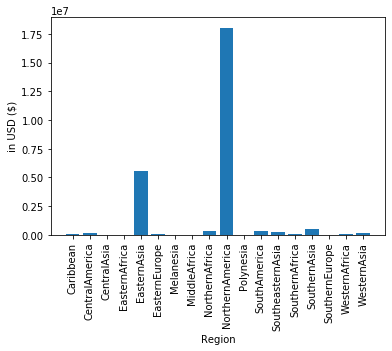

In [19]:
Regions = [country for country, df in gdp_employment.groupby(['Region'])]

plt.bar(Regions,gdp_employment.groupby(['Region']).mean()['GDP: Gross domestic product (million current US$)'])
plt.ylabel('in USD ($)')
plt.xlabel('Region')
plt.xticks(Regions, rotation='vertical', size=10)
plt.show()

NorhternAmerica and EasternAsia are outliers in this case and I feel that I should exclude them for the time being to see a proper graph

#### Graph after excluding NorthAmerica and EasternAsia

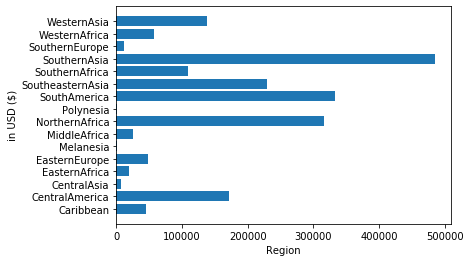

In [24]:
Regions = [country for country, df in gdp_employment_noNAE.groupby(['Region'])]
y_pos = np.arange(len(Regions))
plt.barh(Regions,gdp_employment_noNAE.groupby(['Region']).mean()['GDP: Gross domestic product (million current US$)'])
plt.ylabel('in USD ($)')
plt.xlabel('Region')
plt.yticks(y_pos,Regions)
plt.show()

When we exclude NorthernAmerica and EasternAsia, we can see a much more proper graph where we can see that SouthernAsia is the highest in terms of GDP and Melanesia is the lowest.

## GDP of Africa vs World

In [ ]:
df.loc[df['Region'].str.contains('Africa')]['GDP: Gross domestic product (million current US$)'].mean()

In [ ]:
df['GDP: Gross domestic product (million current US$)'].mean()

## Unemployment Rate

In [ ]:
gdp_employment.groupby(['Region']).mean()['Unemployment (% of labour force)'].sort_values(ascending = False)

In [ ]:
Regions = [country for country, df in gdp_employment.groupby(['Region'])]
plt.bar(Regions,gdp_employment.groupby(['Region']).mean()['Unemployment (% of labour force)'])
plt.ylabel('Percentage (%)')
plt.xlabel('Region')
plt.xticks(Regions, rotation='vertical', size=10)
plt.show()

From the graph above, we can see that SouthernAfrica is the highest in terms of unemployment and SouthernAsia is the lowest.

## Population and Healthcare

In [ ]:
pop = (df[['country','Region','Population in thousands (2017)'
     ,'Population growth rate (average annual %)'
     ,'Urban population growth rate (average annual %)'
           ,'Fertility rate, total (live births per woman)'
     ,'Health: Total expenditure (% of GDP)']])

In [ ]:
pop.sort_values(by = 'Health: Total expenditure (% of GDP)', ascending= False)

## Fertility Rate World vs Africa

In [ ]:
fre = df[['Region','Fertility rate, total (live births per woman)','Education: Government expenditure (% of GDP)']]
fre['Fertility rate, total (live births per woman)'].mean()

In [ ]:
fre.loc[fre['Region'].str.contains('Africa')]['Fertility rate, total (live births per woman)'].mean()

##### The fertility rate in Africa (4.89%) is higher than the the world's average fertility rate (3.44%)

## Education Expenditure World vs Africa

In [ ]:
fre['Education: Government expenditure (% of GDP)'].mean()

In [ ]:
fre.loc[fre['Region'].str.contains('Africa')]['Education: Government expenditure (% of GDP)'].mean()

##### The education expenditure in Africa (4.35%) is lower than the world's average education expenditure (4.53%)

## Healthcare in Africa vs World

In [ ]:
df.loc[df['Region'].str.contains('Africa')]['Health: Total expenditure (% of GDP)'].mean()

In [ ]:
df['Health: Total expenditure (% of GDP)'].mean()

##### The healthcare spending in Africa (6.13%) is lower than the world's average healthcare spending (6.31%)

## Unemployment in Africa vs World

In [ ]:
df.loc[df['Region'].str.contains('Africa')]['Unemployment (% of labour force)'].mean()

In [ ]:
df['Unemployment (% of labour force)'].mean()

##### The unemployment percentage in Africa (8.61%) is higher than the world's average (8.45%)

# Summary

With the data given and after doing data-cleaning and data analyzing, I decided to focus on Africa as Africa can be seen as the least prosperous country right now. Africa has a GDP of 52339.3 million USD, which is lower than the world's average GDP of 485327.9 million USD. GDP is a measure of a country's well-being and in this case, Africa needs to improve their quality of life.

I will seperate the definition of well-being into few parts such as employment percentage, healthcare spending, education expenditure and also fertility rate.

I feel that Africa needs to raise their education expenditure (4.35%) as well as their healthcare spending (6.13%) (which are lower than the world's average of 4.53% and 6.31% respectively). In increasing their healthcare spending and education expenditure, Africa could build more hospitals and this allows for more room in employment. Africans can receive a much better quality of education and may aspire to become doctors to improve healthcare quality. This will lead to a decrease in unemployment rate (which is currently at 8.45% which is lower than the world's average of 8.61%), saving the country from poverty, allowing them to purhase more goods and services, allowing the GDP to increase overtime.

I can also conclude that regions and countries in Africa should shift their focus and raise spending on their education because increasing the quality of education may contribute in lowering the fertility rate (4.89% which is high comparing to the world's average of 3.44% and could be caused by unplanned pregnancies). This could eventually contribute to lowering the population growth rate which could help the country to recover from poverty at a faster rate (overcrowding prevention).